In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import sys
print(sys.version)

3.8.12 (default, Oct 12 2021, 13:02:29) 
[GCC 7.3.0]


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [5]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import h5py
import sklearn
import tensorflow as tf
import tensorflow.keras.backend as K
import scipy as sc
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
import pandas as pd

2022-05-31 12:05:48.097192: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2


In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, Dense, GRU, Add, Concatenate, BatchNormalization, Conv1D, Lambda, Dot, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam


In [8]:
from preprocessor import load, load_flat

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [10]:
#X_train_htt,X_test_htt,Xalt_train_htt,Xalt_test_htt,Xevt_train_htt,Xevt_test_htt,Y_train_htt,Y_test_htt,feat_train_htt,feat_test_htt = load('/nobackup/users/sangeon/GluGluHToTauTau_user.z');
#X_train_flat,X_test_flat,Xalt_train_flat,Xalt_test_flat,Xevt_train_flat,Xevt_test_flat,Y_train_flat,Y_test_flat,feat_train_flat,feat_test_flat = load('/nobackup/users/sangeon/FlatTauTau_user.z',maxevts=0);
#X_train_z,X_test_z,Xalt_train_z,Xalt_test_z,Xevt_train_z,Xevt_test_z,Y_train_z,Y_test_z,feat_train_z,feat_test_z = load('/nobackup/users/sangeon/DYJetsToLL.z');

In [11]:
#feat_selection = np.r_[np.array([0,1,2,3,4]), np.array([6,7,8,9,10])]

In [13]:
import os

In [14]:
os.listdir('/nobackup/users/sangeon/phitautau_UL/May2022/')

['tt-DYJetsToLL_mu.z']

In [15]:
h5File = h5py.File('/nobackup/users/sangeon/phitautau_UL/May2022/tt-DYJetsToLL_mu.z')

/tmp/ipykernel_561431/2227920435.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5File = h5py.File('/nobackup/users/sangeon/phitautau_UL/May2022/tt-DYJetsToLL_mu.z')


In [16]:
h5File

<HDF5 file "tt-DYJetsToLL_mu.z" (mode r+)>

In [12]:
X_flat,Xalt_flat,Xevt_flat,y_flat,feat_flat = load_flat('/nobackup/users/sangeon/phitautau_UL/Apr2022/FlatTauTau_user_mu.z',maxevts=0);
#X_htt1,Xalt_htt1,Xevt_htt1,y_htt1,feat_htt1 = load_flat('/nobackup/users/sangeon/phitautau_UL/GluGluHToTauTau_user_noLep.z');
X_htt2,Xalt_htt2,Xevt_htt2,y_htt2,feat_htt2 = load_flat('/nobackup/users/sangeon/phitautau_UL/Apr2022/GluGluHToTauTau_user_mu.z');
X_z,Xalt_z, Xevt_z, y_z, feat_z = load_flat('/nobackup/users/sangeon/phitautau_UL/tt-DYJetsToLL_mu.z');

/home/sangeon/MassRegression/preprocessor.py:137: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5File = h5py.File(iFile)


<HDF5 file "FlatTauTau_user_mu.z" (mode r+)>
(562250, 599)
599
PF_dzerr0 found nan!!
PF_dzerr1 found nan!!
PF_dxyerr1 found nan!!
PF_dzerr2 found nan!!
PF_dzerr3 found nan!!
PF_dxyerr3 found nan!!
PF_dzerr4 found nan!!
PF_dxyerr4 found nan!!
PF_dzerr5 found nan!!
PF_dxyerr5 found nan!!
PF_dzerr6 found nan!!
PF_dzerr7 found nan!!
(561691, 390)
(561691, 30, 13)
(561691, 65)
(561691, 5, 13)
(561691, 12)


/home/sangeon/MassRegression/preprocessor.py:137: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5File = h5py.File(iFile)


<HDF5 file "GluGluHToTauTau_user_mu.z" (mode r+)>
(2489, 599)
599
(2489, 390)
(2489, 30, 13)
(2489, 65)
(2489, 5, 13)
(2489, 12)
<HDF5 file "tt-DYJetsToLL_mu.z" (mode r+)>


/home/sangeon/MassRegression/preprocessor.py:137: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5File = h5py.File(iFile)


(44534, 599)
599
PF_dzerr0 found nan!!
PF_dzerr2 found nan!!
PF_dzerr3 found nan!!
PF_dzerr4 found nan!!
(44524, 390)
(44524, 30, 13)
(44524, 65)
(44524, 5, 13)
(44524, 12)


In [13]:
X_htt = np.vstack([X_htt2])

Xalt_htt = np.vstack([Xalt_htt2])

Xevt_htt = np.vstack([Xevt_htt2])

y_htt = np.vstack([y_htt2])

feat_htt = np.vstack([feat_htt2])

In [14]:
#X_htt = np.vstack([X_htt1, X_htt2])

#Xalt_htt = np.vstack([Xalt_htt1, Xalt_htt2])

#Xevt_htt = np.vstack([Xevt_htt1, Xevt_htt2])

#y_htt = np.vstack([y_htt1, y_htt2])

#feat_htt = np.vstack([feat_htt1, feat_htt2])

In [15]:
print(X_htt.shape, X_z.shape, X_flat.shape)

(2489, 30, 13) (44524, 30, 13) (561691, 30, 13)


In [16]:
#met cut > 40 GeV

#Z tagger 20 

In [17]:
#X_htt = X_htt[:,:,feat_selection]
#X_z = X_z[:,:,feat_selection]
#X_flat = X_flat[:,:,feat_selection]

In [18]:
prefix = "/nobackup/users/sangeon/phitautau_figures/UL/"

In [19]:
%matplotlib inline

In [20]:
from matplotlib.offsetbox import AnchoredText


In [21]:
prefix

'/nobackup/users/sangeon/phitautau_figures/UL/'

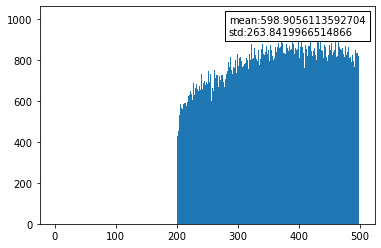

In [22]:
plt.hist(Xevt_flat[:,-3],bins=np.arange(0,500,1));

summary = f'''mean:{np.mean(Xevt_flat[:,-3])}
std:{np.std(Xevt_flat[:,-3])}'''

anchored_text = AnchoredText(summary, loc=1)
#anchored_text2 = AnchoredText(f"std:{np.std(Xevt_flat[:,-4])}", loc=4)

ax = plt.gca()
ax.add_artist(anchored_text)
#ax.add_artist(anchored_text2)
#plt.savefig(prefix+'flat_msd.pdf')

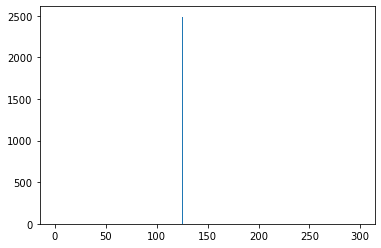

In [23]:
plt.hist(y_htt[:,-4],bins=np.arange(0,300,1));


In [24]:
target = ["fj_genMass","fj_genPt","fj_genEta","fj_genPhi"]
target_old = "fj_msd"
#target_norm = "fj_msd"
target_norm = ""
evt_feats = ["MET_covXX","MET_covXY","MET_covYY","MET_phi","MET_pt","MET_significance","PuppiMET_pt","PuppiMET_phi","fj_msd","fj_pt","fj_eta","fj_phi"]

In [25]:
prefix

'/nobackup/users/sangeon/phitautau_figures/UL/'

In [26]:
#target[i]

In [27]:
print(prefix+f'{target[0]}.png')

/nobackup/users/sangeon/phitautau_figures/UL/fj_genMass.png


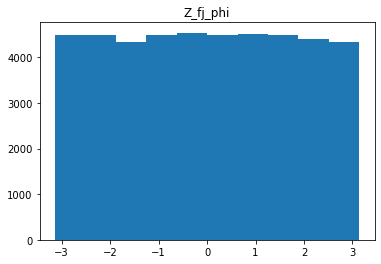

In [28]:
for i in range(12):
    plt.clf()
    plt.hist(Xevt_z[:,i])
    plt.title(f'Z_{evt_feats[i]}')
    plt.savefig(prefix+f'Z_{evt_feats[i]}.png')


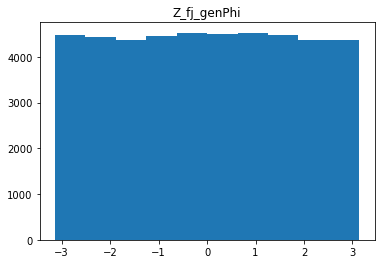

In [29]:
for i in range(4):
    plt.clf()
    plt.hist(y_z[:,i])
    plt.title(f'Z_{target[i]}')
    plt.savefig(prefix+f'Z_{target[i]}.png')


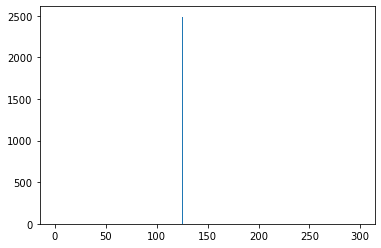

In [30]:
plt.hist(y_htt[:,-4],bins=np.arange(0,300,1));
plt.savefig(prefix+'htt_genm.pdf')

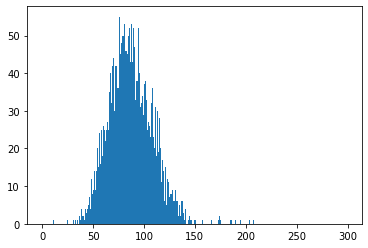

In [31]:
plt.hist(Xevt_htt[:,-4],bins=np.arange(0,300,1));
plt.savefig(prefix+'htt_msd.pdf')

In [32]:
feat_htt.shape

(2489, 29)

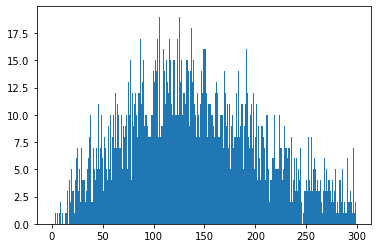

In [33]:
plt.hist(Xevt_htt[:,4],bins=np.arange(0,300,1));
plt.savefig(prefix+'htt_met.pdf')

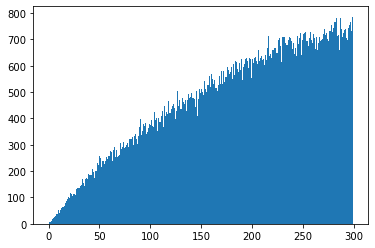

In [34]:
plt.hist(Xevt_flat[:,4],bins=np.arange(0,300,1));
plt.savefig(prefix+'flat_met.pdf')

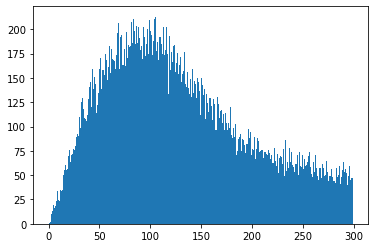

In [35]:
plt.hist(Xevt_z[:,4],bins=np.arange(0,300,1));
plt.savefig(prefix+'z_met.pdf')

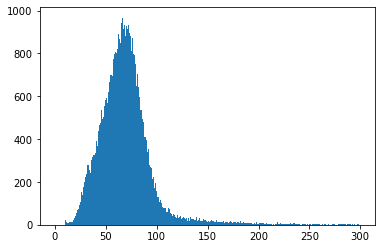

In [36]:
plt.hist(Xevt_z[:,-4],bins=np.arange(0,300,1));
plt.savefig(prefix+'z_msd.pdf')

In [37]:
flat_msd_cut = np.where((Xevt_flat[:,-4]>10)&(Xevt_flat[:,-4]<400)&(Xevt_flat[:,4]>40))
htt_msd_cut = np.where((Xevt_htt[:,-4]>10)&(Xevt_htt[:,-4]<400)&(Xevt_htt[:,4]>40))
z_msd_cut = np.where((Xevt_z[:,-4]>10)&(Xevt_z[:,-4]<400)&(y_z[:,-4]>5)&(Xevt_z[:,4]>40))

In [38]:
#flat_msd_cut = np.where((Xevt_flat[:,-4]>20)&(Xevt_flat[:,-3]>200)&(y_flat[:,1]>400))
#htt_msd_cut = np.where((Xevt_htt[:,-4]>20)&(Xevt_htt[:,-3]>200)&(y_htt[:,1]>400))
#z_msd_cut = np.where((Xevt_z[:,-4]>20)&(Xevt_z[:,-3]>200)&(y_z[:,1]>400))

In [39]:
X_flat,Xalt_flat,Xevt_flat,y_flat,feat_flat = X_flat[flat_msd_cut], Xalt_flat[flat_msd_cut], Xevt_flat[flat_msd_cut], y_flat[flat_msd_cut], feat_flat[flat_msd_cut]

X_htt,Xalt_htt,Xevt_htt,y_htt,feat_htt = X_htt[htt_msd_cut], Xalt_htt[htt_msd_cut], Xevt_htt[htt_msd_cut], y_htt[htt_msd_cut], feat_htt[htt_msd_cut]

X_z,Xalt_z,Xevt_z,y_z,feat_z = X_z[z_msd_cut], Xalt_z[z_msd_cut], Xevt_z[z_msd_cut], y_z[z_msd_cut], feat_z[z_msd_cut]

In [40]:
print(X_flat.shape, X_htt.shape, X_z.shape)

(557324, 30, 13) (2378, 30, 13) (41938, 30, 13)


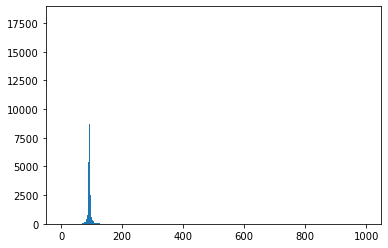

In [41]:
plt.hist(y_z[:,-4],bins=np.arange(0,1000,2));


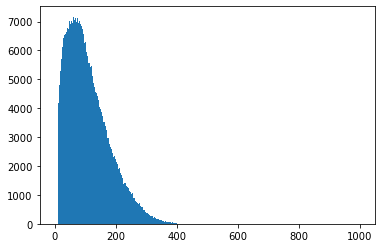

In [42]:
plt.hist(Xevt_flat[:,-4],bins=np.arange(0,1000,2));
#plt.savefig(prefix+'flat_msd_after_cut.pdf')

In [43]:
X_htt, Xalt_htt, Xevt_htt, y_htt = sklearn.utils.shuffle(X_htt, Xalt_htt, Xevt_htt, y_htt)
X_z, Xalt_z, Xevt_z, y_z = sklearn.utils.shuffle(X_z, Xalt_z, Xevt_z, y_z)
X_flat, Xalt_flat, Xevt_flat, y_flat = sklearn.utils.shuffle(X_flat, Xalt_flat, Xevt_flat, y_flat)

## Make Mixture Dataset

In [44]:
#wp_list = [0.2, 0.5, 0.8]
#wp_choice = 1
#wp = wp_list[wp_choice]
#print(wp)
#X_train_split1_htt, X_train_split2_htt, Xalt_train_split1_htt, Xalt_train_split2_htt, Xevt_train_split1_htt, Xevt_train_split2_htt, y_train_split1_htt, y_train_split2_htt = train_test_split(X_train_htt, Xalt_train_htt, Xevt_train_htt, Y_train_htt, test_size=wp, random_state=42)
#X_train_split1_z, X_train_split2_z, Xalt_train_split1_z, Xalt_train_split2_z, Xevt_train_split1_z, Xevt_train_split2_z, y_train_split1_z, y_train_split2_z = train_test_split(X_train_z, Xalt_train_z, Xevt_train_z, Y_train_z, test_size=wp, random_state=42)
#mixratio = round(X_train_split1_htt.shape[0]/(X_train_flat.shape[0]+X_train_split1_htt.shape[0])*100)
#print(mixratio)
#X_train = X_train_flat
#Xalt_train = Xalt_train_flat
#Xevt_train = Xevt_train_flat
#y_train = (Y_train_flat[:,0])

In [45]:
#X_train = np.vstack((X_train_split1_htt, X_train_split1_z, X_train_flat))
#Xalt_train = np.vstack((Xalt_train_split1_htt, Xalt_train_split1_z, Xalt_train_flat))
#Xevt_train = np.vstack((Xevt_train_split1_htt, Xevt_train_split1_z, Xevt_train_flat))
#y_train = np.concatenate((y_train_split1_htt[:,0], y_train_split1_z[:,0], Y_train_flat[:,0]))

In [46]:
#X_val = np.vstack((X_train_split2_htt, X_train_split2_z,X_test_flat))
#Xalt_val = np.vstack((Xalt_train_split2_htt, Xalt_train_split2_z,Xalt_test_flat))
#Xevt_val = np.vstack((Xevt_train_split2_htt, Xevt_train_split2_z,Xevt_test_flat))
#y_val = np.concatenate((y_train_split2_htt[:,0], y_train_split2_z[:,0], Y_test_flat[:,0]))

# Network Parameters

In [47]:
particlesConsidered = 30
entriesPerParticle = 13

svConsidered = 5
entriesPerSV = 13

eventDataLength = 12

#decayTypeColumn = 380
#trainingDataLength = 1070000
#validationDataLength = 130000

numberOfEpochs = 1000
batchSize = 500



# Network Architecture

In [48]:
## receiving matrix

RR = []
for i in range(particlesConsidered):
    row = []
    for j in range(particlesConsidered * (particlesConsidered - 1)):
        if j in range(i * (particlesConsidered - 1), (i + 1) * (particlesConsidered - 1)):
            row.append(1.0)
        else:
            row.append(0.0)
    RR.append(row)
RR = np.array(RR)
RR = np.float32(RR)
RRT = np.transpose(RR)

## sending matrix

RST = []
for i in range(particlesConsidered):
    for j in range(particlesConsidered):
        row = []
        for k in range(particlesConsidered):
            if k == j:
                row.append(1.0)
            else:
                row.append(0.0)
        RST.append(row)
rowsToRemove = []
for i in range(particlesConsidered):
    rowsToRemove.append(i * (particlesConsidered + 1))
RST = np.array(RST)
RST = np.float32(RST)
RST = np.delete(RST, rowsToRemove, 0)
RS = np.transpose(RST)

## recieving matrix for the bipartite particle and secondary vertex graph

RK = []
for i in range(particlesConsidered):
    row = []
    for j in range(particlesConsidered * svConsidered):
        if j in range(i * svConsidered, (i + 1) * svConsidered):
            row.append(1.0)
        else:
            row.append(0.0)
    RK.append(row)
RK = np.array(RK)
RK = np.float32(RK)
RKT = np.transpose(RK)

## defines the sending matrix for the bipartite particle and secondary vertex graph


RV = []
for i in range(svConsidered):
    row = []
    for j in range(particlesConsidered * svConsidered):
        if j % svConsidered == i:
            row.append(1.0)
        else:
            row.append(0.0)
    RV.append(row)
RV = np.array(RV)
RV = np.float32(RV)
RVT = np.transpose(RV)

In [49]:
inputParticle = Input(shape=(particlesConsidered, entriesPerParticle), name="inputParticle")

XdotRR = Lambda(lambda tensor: tf.transpose(tf.tensordot(tf.transpose(tensor, perm=(0, 2, 1)), RR, axes=[[2], [0]]),
                                            perm=(0, 2, 1)), name="XdotRR")(inputParticle)
XdotRS = Lambda(lambda tensor: tf.transpose(tf.tensordot(tf.transpose(tensor, perm=(0, 2, 1)), RS, axes=[[2], [0]]),
                                            perm=(0, 2, 1)), name="XdotRS")(inputParticle)
Bpp = Lambda(lambda tensorList: tf.concat((tensorList[0], tensorList[1]), axis=2), name="Bpp")([XdotRR, XdotRS])

convOneParticle = Conv1D(60, kernel_size=1, activation="relu", name="convOneParticle")(Bpp)
convTwoParticle = Conv1D(30, kernel_size=1, activation="relu", name="convTwoParticle")(convOneParticle)
convThreeParticle = Conv1D(20, kernel_size=1, activation="relu", name="convThreeParticle")(convTwoParticle)

Epp = BatchNormalization(momentum=0.6, name="Epp")(convThreeParticle)

# Secondary vertex data interaction NN
inputSV = Input(shape=(svConsidered, entriesPerSV), name="inputSV")

XdotRK = Lambda(lambda tensor: tf.transpose(tf.tensordot(tf.transpose(tensor, perm=(0, 2, 1)), RK, axes=[[2], [0]]),
                                            perm=(0, 2, 1)), name="XdotRK")(inputParticle)
YdotRV = Lambda(lambda tensor: tf.transpose(tf.tensordot(tf.transpose(tensor, perm=(0, 2, 1)), RV, axes=[[2], [0]]),
                                            perm=(0, 2, 1)), name="YdotRV")(inputSV)
Bvp = Lambda(lambda tensorList: tf.concat((tensorList[0], tensorList[1]), axis=2), name="Bvp")([XdotRK, YdotRV])

convOneSV = Conv1D(60, kernel_size=1, activation="relu", name="convOneSV")(Bvp)
convTwoSV = Conv1D(30, kernel_size=1, activation="relu", name="convTwoSV")(convOneSV)
convThreeSV = Conv1D(20, kernel_size=1, activation="relu", name="convThreeSV")(convTwoSV)

Evp = BatchNormalization(momentum=0.6, name="Evp")(convThreeSV)


# Event Level Info

inputEvent = Input(shape=(eventDataLength, ), name="inputEvent")


# Combined prediction NN
EppBar = Lambda(lambda tensor: tf.transpose(tf.tensordot(tf.transpose(tensor, perm=(0, 2, 1)), RRT, axes=[[2], [0]]),
                                            perm=(0, 2, 1)), name="EppBar")(Epp)
EvpBar = Lambda(lambda tensor: tf.transpose(tf.tensordot(tf.transpose(tensor, perm=(0, 2, 1)), RKT, axes=[[2], [0]]),
                                            perm=(0, 2, 1)), name="EvpBar")(Evp)
C = Lambda(lambda listOfTensors: tf.concat((listOfTensors[0], listOfTensors[1], listOfTensors[2]), axis=2), name="C")(
    [inputParticle, EppBar, EvpBar])

convPredictOne = Conv1D(60, kernel_size=1, activation="relu", name="convPredictOne")(C)
convPredictTwo = Conv1D(30, kernel_size=1, activation="relu", name="convPredictTwo")(convPredictOne)

O = Conv1D(24, kernel_size=1, activation="relu", name="O")(convPredictTwo)

# Calculate output
OBar = Lambda(lambda tensor: K.sum(tensor, axis=1), name="OBar")(O)

Concatted = Concatenate()([OBar, inputEvent])

denseEndOne = Dense(50, activation="relu", name="denseEndOne")(Concatted)
normEndOne = BatchNormalization(momentum=0.6, name="normEndOne")(denseEndOne)
denseEndTwo = Dense(20, activation="relu", name="denseEndTwo")(normEndOne)
denseEndThree = Dense(10, activation="relu", name="denseEndThree")(denseEndTwo)
output = Dense(2,name="output")(denseEndThree)

2022-05-17 13:52:13.266717: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-17 13:52:13.267838: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-17 13:52:13.310404: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0004:05:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.50GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-17 13:52:13.310439: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2
2022-05-17 13:52:13.592019: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-05-17 13:52:13.592060: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2

In [50]:
print(X_flat.shape, X_htt.shape, X_z.shape)

(557324, 30, 13) (2378, 30, 13) (41938, 30, 13)


In [51]:
#NUM_H = [12000,15000,20000,25000,30000] #12000 done
#NUM_Z = [12000,15000,20000,25000,30000]

#NUM_H = [12000] #12000 done
#NUM_Z = [20000,25000,30000]

#NUM_H = [15000]
#NUM_Z = [12000,15000,20000,25000,30000]

#NUM_H = [15000]
#NUM_Z = [25000,30000]

#NUM_H = [20000]
#NUM_Z = [12000,15000,20000,25000,30000]

#NUM_H = [25000]
#NUM_Z = [12000,15000,20000]

#NUM_H = [25000,30000]
#NUM_Z = [25000,30000]

#NUM_H = [30000]
#NUM_Z = [25000,30000]

NUM_H = [50000]
NUM_Z = [50000]

#NUM_H = [100000]
#NUM_Z = [100000]
#NUM_H = [2000,4000]
#NUM_Z = [2000,4000]
#NUM_H = [6000,7000,8000]
#NUM_Z = [6000,7000,8000]
HOW_MANY_FLAT_TO_TRAINING = 0
#HOW_MANY_H_Z_TO_VALIDATION = 200000
#HOW_MANY_FLAT_TO_VALIDATION = 200000
#HOW_MANY_H_Z_TO_VALIDATION = 100000
#HOW_MANY_FLAT_TO_VALIDATION = 100000
TEST_SIZE = 10000
#lamb_list = [0.005, 0.01, 0.05, 0.1, 0.5, 1]
lamb_list = [0.005, 0.01, 0.05]

In [52]:
%matplotlib inline
prefix = "/nobackup/users/sangeon/phitautau_figures/UL/"

In [53]:
y_htt.shape

(2378, 4)

In [54]:
from tensorflow.python.ops import math_ops
from scipy import stats

In [55]:
a= np.array([[1,2,3,4],[5,6,7,8]])
print(a.shape)
print(np.mean(a,axis=-1))

(2, 4)
[2.5 6.5]


In [56]:
def mean_sqrt_error(y_true, y_pred):
    diff = math_ops.abs((y_true - y_pred) / K.maximum(tf.sqrt(y_true), K.epsilon()))
    return diff[...,0]+lamb*diff[...,1]
    

In [57]:
plt.rcParams["figure.figsize"] = (8,8)

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

In [58]:
from scipy import stats

In [59]:
X_qcd,Xalt_qcd,Xevt_qcd,y_qcd,feat_qcd = load_flat('/nobackup/users/sangeon/phitautau_UL/Apr2022/WJetsToLNu_mu.z',maxevts=10000);


/home/sangeon/MassRegression/preprocessor.py:137: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5File = h5py.File(iFile)


<HDF5 file "WJetsToLNu_mu.z" (mode r+)>
(636796, 599)
599
(10000, 390)
(10000, 30, 13)
(10000, 65)
(10000, 5, 13)
(10000, 12)


In [60]:
qcd_msd_cut = np.where((Xevt_qcd[:,-4]>10)&(Xevt_qcd[:,-4]<400))


In [61]:
X_qcd,Xalt_qcd,Xevt_qcd,y_qcd,feat_qcd = X_qcd[qcd_msd_cut], Xalt_qcd[qcd_msd_cut], Xevt_qcd[qcd_msd_cut], y_qcd[qcd_msd_cut], feat_qcd[qcd_msd_cut]


In [62]:
#X_qcd = X_qcd[:,:,feat_selection]

In [63]:
#%matplotlib inline
#prefix='/nobackup/users/sangeon/figures/finalPlots/'

In [64]:
#wps = [(15000,20000,0.1)]
wps = [(20000,25000,0.01)]
#wps = [(0,30000,0.01)]
#wps = [(10000,10000,0.01)]

In [65]:
wps = [(10000,10000,0.1)]

In [66]:
wps = [(5000,5000,0.1)]

In [67]:
wps = [(7000,7000,0.01)]

In [68]:
wps = [(9000,16000,0.01)]

In [69]:
wps = [(2300,4000,0.01)]

In [70]:
TEST_SIZE = 10000
lamb_list = [0.005, 0.01, 0.05]
HOW_MANY_FLAT_TO_TRAINING = 500000

In [71]:
prefix

'/nobackup/users/sangeon/phitautau_figures/UL/'

In [72]:
X_htt.shape

(2378, 30, 13)

In [73]:
X_flat.shape

(557324, 30, 13)

In [74]:
X_z.shape

(41938, 30, 13)

In [75]:
wps = [(2000,6000,0.01),(2000,8000,0.01),(2000,10000,0.01)]

In [76]:
wps = [(2000,6000,0.01)]

In [77]:
class PredictionCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, x_test, y_test):
        self.model  = model
        self.x_test = x_test
        self.y_test = y_test
        
    def on_epoch_end(self, epoch, logs={}):
        #print(type(self.validation_data))
        y_pred = self.model.predict(self.x_test)
        print('prediction: {} at epoch: {}'.format(y_pred, epoch))
        print('prediction Truth: {} at epoch: {}'.format(self.y_test, epoch))

In [78]:
K.clear_session()

In [79]:
prefix = './figs/hadmu/'

[[ 94.538795 784.8232  ]]
-0.01999999999999935


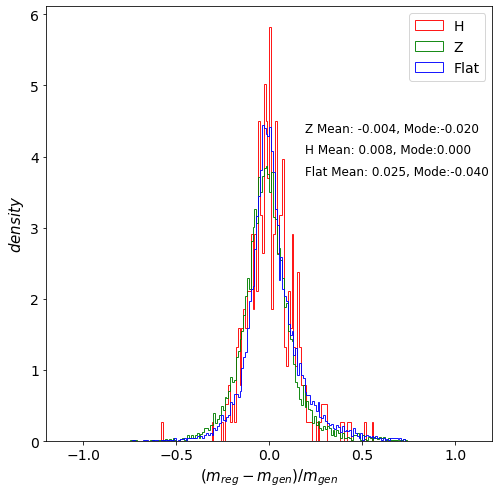

In [97]:
for HOW_MANY_H_TO_TRAINING, HOW_MANY_Z_TO_TRAINING, lamb in wps:

            modelName=f"NEW_UL_NoFeatSel_H{HOW_MANY_H_TO_TRAINING}_Z{HOW_MANY_Z_TO_TRAINING}_FLAT{HOW_MANY_FLAT_TO_TRAINING}_Lambda{lamb}_hadmu"
            #modelName=f"Mass_and_Pt_IN_H{HOW_MANY_H_TO_TRAINING}_Z{HOW_MANY_Z_TO_TRAINING}_Lambda{lamb}_FLAT500k_genPtCut400_msd5_met50"
            inputParticle = Input(shape=(particlesConsidered, entriesPerParticle), name="inputParticle")

            XdotRR = Lambda(lambda tensor: tf.transpose(tf.tensordot(tf.transpose(tensor, perm=(0, 2, 1)), RR, axes=[[2], [0]]),
                                                        perm=(0, 2, 1)), name="XdotRR")(inputParticle)
            XdotRS = Lambda(lambda tensor: tf.transpose(tf.tensordot(tf.transpose(tensor, perm=(0, 2, 1)), RS, axes=[[2], [0]]),
                                                        perm=(0, 2, 1)), name="XdotRS")(inputParticle)
            Bpp = Lambda(lambda tensorList: tf.concat((tensorList[0], tensorList[1]), axis=2), name="Bpp")([XdotRR, XdotRS])

            convOneParticle = Conv1D(60, kernel_size=1, activation="relu", name="convOneParticle")(Bpp)
            convTwoParticle = Conv1D(30, kernel_size=1, activation="relu", name="convTwoParticle")(convOneParticle)
            convThreeParticle = Conv1D(20, kernel_size=1, activation="relu", name="convThreeParticle")(convTwoParticle)

            Epp = BatchNormalization(momentum=0.6, name="Epp")(convThreeParticle)

            # Secondary vertex data interaction NN
            inputSV = Input(shape=(svConsidered, entriesPerSV), name="inputSV")

            XdotRK = Lambda(lambda tensor: tf.transpose(tf.tensordot(tf.transpose(tensor, perm=(0, 2, 1)), RK, axes=[[2], [0]]),
                                                        perm=(0, 2, 1)), name="XdotRK")(inputParticle)
            YdotRV = Lambda(lambda tensor: tf.transpose(tf.tensordot(tf.transpose(tensor, perm=(0, 2, 1)), RV, axes=[[2], [0]]),
                                                        perm=(0, 2, 1)), name="YdotRV")(inputSV)
            Bvp = Lambda(lambda tensorList: tf.concat((tensorList[0], tensorList[1]), axis=2), name="Bvp")([XdotRK, YdotRV])

            convOneSV = Conv1D(60, kernel_size=1, activation="relu", name="convOneSV")(Bvp)
            convTwoSV = Conv1D(30, kernel_size=1, activation="relu", name="convTwoSV")(convOneSV)
            convThreeSV = Conv1D(20, kernel_size=1, activation="relu", name="convThreeSV")(convTwoSV)

            Evp = BatchNormalization(momentum=0.6, name="Evp")(convThreeSV)


            # Event Level Info

            inputEvent = Input(shape=(eventDataLength, ), name="inputEvent")


            # Combined prediction NN
            EppBar = Lambda(lambda tensor: tf.transpose(tf.tensordot(tf.transpose(tensor, perm=(0, 2, 1)), RRT, axes=[[2], [0]]),
                                                        perm=(0, 2, 1)), name="EppBar")(Epp)
            EvpBar = Lambda(lambda tensor: tf.transpose(tf.tensordot(tf.transpose(tensor, perm=(0, 2, 1)), RKT, axes=[[2], [0]]),
                                                        perm=(0, 2, 1)), name="EvpBar")(Evp)
            C = Lambda(lambda listOfTensors: tf.concat((listOfTensors[0], listOfTensors[1], listOfTensors[2]), axis=2), name="C")(
                [inputParticle, EppBar, EvpBar])

            convPredictOne = Conv1D(60, kernel_size=1, activation="relu", name="convPredictOne")(C)
            convPredictTwo = Conv1D(30, kernel_size=1, activation="relu", name="convPredictTwo")(convPredictOne)

            O = Conv1D(24, kernel_size=1, activation="relu", name="O")(convPredictTwo)

            # Calculate output
            OBar = Lambda(lambda tensor: K.sum(tensor, axis=1), name="OBar")(O)

            Concatted = Concatenate()([OBar, inputEvent])

            denseEndOne = Dense(50, activation="relu", name="denseEndOne")(Concatted)
            normEndOne = BatchNormalization(momentum=0.6, name="normEndOne")(denseEndOne)
            denseEndTwo = Dense(20, activation="relu", name="denseEndTwo")(normEndOne)
            denseEndThree = Dense(10, activation="relu", name="denseEndThree")(denseEndTwo)
            output = Dense(2,name="output")(denseEndThree)

            X_train = np.vstack((X_htt[:HOW_MANY_H_TO_TRAINING], X_z[:HOW_MANY_Z_TO_TRAINING], X_flat[:HOW_MANY_FLAT_TO_TRAINING]))
            Xalt_train = np.vstack((Xalt_htt[:HOW_MANY_H_TO_TRAINING], Xalt_z[:HOW_MANY_Z_TO_TRAINING], Xalt_flat[:HOW_MANY_FLAT_TO_TRAINING]))
            Xevt_train = np.vstack((Xevt_htt[:HOW_MANY_H_TO_TRAINING], Xevt_z[:HOW_MANY_Z_TO_TRAINING], Xevt_flat[:HOW_MANY_FLAT_TO_TRAINING]))
            y_train = np.concatenate((y_htt[:HOW_MANY_H_TO_TRAINING,0:2], y_z[:HOW_MANY_Z_TO_TRAINING,0:2], y_flat[:HOW_MANY_FLAT_TO_TRAINING,0:2]))
            #plt.hist(y_train[:,0])
            #plt.hist(y_train[:,1])
            #plt.show()
            X_test_htt = X_htt[HOW_MANY_H_TO_TRAINING :HOW_MANY_H_TO_TRAINING +TEST_SIZE]
            X_test_z   = X_z[HOW_MANY_Z_TO_TRAINING :HOW_MANY_Z_TO_TRAINING +TEST_SIZE]

            Xalt_test_htt = Xalt_htt[HOW_MANY_H_TO_TRAINING :HOW_MANY_H_TO_TRAINING +TEST_SIZE]
            Xalt_test_z   = Xalt_z[HOW_MANY_Z_TO_TRAINING :HOW_MANY_Z_TO_TRAINING +TEST_SIZE]

            Xevt_test_htt = Xevt_htt[HOW_MANY_H_TO_TRAINING :HOW_MANY_H_TO_TRAINING +TEST_SIZE]
            Xevt_test_z = Xevt_z[HOW_MANY_Z_TO_TRAINING :HOW_MANY_Z_TO_TRAINING +TEST_SIZE]

            y_test_htt = y_htt[HOW_MANY_H_TO_TRAINING :HOW_MANY_H_TO_TRAINING +TEST_SIZE,0:2]
            y_test_z  = y_z[HOW_MANY_Z_TO_TRAINING :HOW_MANY_Z_TO_TRAINING +TEST_SIZE,0:2]

            X_test_flat   = X_flat[HOW_MANY_FLAT_TO_TRAINING :HOW_MANY_FLAT_TO_TRAINING +TEST_SIZE]
            Xalt_test_flat   = Xalt_flat[HOW_MANY_FLAT_TO_TRAINING :HOW_MANY_FLAT_TO_TRAINING +TEST_SIZE]
            Xevt_test_flat = Xevt_flat[HOW_MANY_FLAT_TO_TRAINING :HOW_MANY_FLAT_TO_TRAINING +TEST_SIZE]
            y_test_flat  = y_flat[HOW_MANY_FLAT_TO_TRAINING :HOW_MANY_FLAT_TO_TRAINING +TEST_SIZE,0:2]

            X_train, Xalt_train, Xevt_train, y_train = sklearn.utils.shuffle(X_train, Xalt_train, Xevt_train, y_train)
            X_train, X_val, Xalt_train, Xalt_val, Xevt_train, Xevt_val, y_train, y_val = train_test_split(X_train, Xalt_train, Xevt_train, y_train, test_size=0.2, random_state=42)


            #print(X_train[0] )
            #print(X_test_htt[0])
            

            model = Model(inputs=[inputParticle, inputSV, inputEvent], outputs=[output])
            opt = Adam(lr=0.001)
            model.compile(optimizer=opt, loss=mean_sqrt_error, metrics=[mean_sqrt_error])
            modelCallbacks = [EarlyStopping(patience=10),ModelCheckpoint(filepath="./weights/"+modelName+".h5", save_weights_only=True, save_best_only=True)]
            PredictionCallback(model, [X_val, Xalt_val, Xevt_val], y_val )
            #history = model.fit([X_train, Xalt_train, Xevt_train], y_train, epochs=numberOfEpochs, batch_size=batchSize,
            #                    callbacks=modelCallbacks,
            #                    validation_data=([X_val, Xalt_val, Xevt_val], y_val))


            #model.save("./saved_model/"+modelName)
            model.load_weights("./weights/"+modelName+".h5")
            predictions_htt = model.predict([X_test_htt, Xalt_test_htt, Xevt_test_htt])
            predictions_z = model.predict([X_test_z, Xalt_test_z, Xevt_test_z])
            
            
            #print(X_test_z[:1])
            #print(Xalt_test_z[:1])
            #print(Xevt_test_z[:1])
            
            #print(predictions_z[0,:])
            
            predict_one = model.predict([X_one, Xalt_one, Xevt_one])
            print(predict_one)

            #_, bins_z, patches_z = plt.hist(predictions_z[:,0],bins=np.arange(50,200,0.5),linewidth=1.5,density=True,facecolor="None");
            #_, bins_h, patches_h = plt.hist(predictions_htt[:,0],bins=np.arange(50,200,0.5),linewidth=1.5,density=True,facecolor="None");
            #plt.hist(predictions_z[:,0],bins=np.arange(50,200,1),linewidth=2,density=True,histtype="step",color="C0",label="Z");
            #plt.hist(predictions_htt[:,0],bins=np.arange(50,200,1),linewidth=2,density=True,histtype="step",color="C1",label="Higgs");
            #plt.axvline(x=np.quantile(predictions_htt[:,0],0.1),color='C1',linewidth=2)
            #for i in range(len(bins_z)-1):
            #    #print(bins_h[i])
            #    if bins_z[i] > np.quantile(predictions_htt[:,0],0.1):
            #        plt.setp(patches_z[i], facecolor="C0",alpha=0.3)


            #for i in range(len(bins_h)-1):
            #    #print(bins_h[i])
            #    if bins_h[i] > np.quantile(predictions_htt[:,0],0.1):
            #        plt.setp(patches_h[i], facecolor="C1",alpha=0.3)

            #plt.legend(loc='upper left')    
            #plt.text(np.quantile(predictions_htt[:,0],0.1),0.015,'90% of Higgs to the Right',ha='center', va='center',rotation='vertical', backgroundcolor='None')
            #score_complement=stats.percentileofscore(predictions_z[:,0],np.quantile(predictions_htt[:,0],0.1))/100
            #score = 1.-score_complement
            #summary = r'$P(m_{Z,reg} > cutoff)=$'f'{score:.3f}''\n'r'$1 / \sqrt{P} = $'f'{1/np.sqrt(score):.3f}'
            #anchored_text = AnchoredText(summary, loc=1)

            #ax = plt.gca()
            #ax.add_artist(anchored_text)
            #plt.title(f'{HOW_MANY_H_TO_TRAINING}H and {HOW_MANY_Z_TO_TRAINING}Z mixed, Lambda={lamb}')

            #plt.savefig(prefix+f'summaryscore-{1/np.sqrt(score):.4f}'+modelName+f'.png')
            #plt.show()

            #count_z, bins_z, patches_z = plt.hist(predictions_z[:,0],bins=np.arange(50,210,10),linewidth=1.5,density=True,facecolor="None");
            #count_h, bins_h, patches_h = plt.hist(predictions_htt[:,0],bins=np.arange(50,210,10),linewidth=1.5,density=True,facecolor="None");
            #plt.hist(predictions_z[:,0],bins=np.arange(50,210,10),linewidth=2,density=True,histtype="step",color="C0",label="Z");
            #plt.hist(predictions_htt[:,0],bins=np.arange(50,210,10),linewidth=2,density=True,histtype="step",color="C1",label="Higgs");
            #plt.axvline(x=110,color='r',linewidth=2,alpha=0.4)
            #plt.axvline(x=140,color='r',linewidth=2,alpha=0.4)
            #S = 0.
            #B = 0.
            #for i in range(len(bins_z)-1):
            #    #print(bins_h[i])
            #    if bins_z[i] in [110,120,130]:
            #        plt.setp(patches_z[i], facecolor="C0",alpha=0.2)
            #        plt.setp(patches_h[i], facecolor="C1",alpha=0.2)
            #        S += count_h[i]
            #        B += count_z[i]

            #significance = S/math.sqrt(B)
            #summary = r'$\frac{P(m_{H,reg} \in [110,140])}{\sqrt{P(m_{Z,reg} \in [110,140])}}=$'f'{significance:.3f}'
            #anchored_text = AnchoredText(summary, loc=1,prop=dict(fontsize=15))
            #plt.legend(loc='upper left')    

            #ax = plt.gca()
            #ax.add_artist(anchored_text)
            #plt.title(f'{HOW_MANY_H_TO_TRAINING}H and {HOW_MANY_Z_TO_TRAINING}Z mixed, Lambda={lamb}')

            #plt.savefig(prefix+f'significance-{np.sqrt(significance):.4f}'+modelName+f'.png')

            #plt.show()
            
            
            #predictions_qcd = model.predict([X_qcd, Xalt_qcd, Xevt_qcd])
            #mass_qcd = predictions_qcd[:,0]
    
            #H_rec = (mass_qcd.flatten()-y_test_htt[:,0])/y_test_htt[:,0]

            #plt.hist(mass_qcd,bins=np.arange(0,300,1),color='C0',label='Reconstructed Mass',alpha=0.2,density=True);
            #plt.hist(y_qcd[:10000,0],bins=np.arange(0,300,10),color='C1',label='gen Mass',alpha=0.2,density=True)
            #plt.axvline(x=125,color='r')
            #plt.text(110,500,'m=125',rotation=90,fontsize=15)
            #plt.title(f'QCD, {HOW_MANY_H_TO_TRAINING}H and {HOW_MANY_Z_TO_TRAINING}Z mixed')
            #plt.legend()
            #plt.xlabel('M (GeV)')
            #plt.ylabel('Density')

            #summary = f'''mean:{np.mean(mass_qcd)}
            #std:{np.std(mass_qcd)}'''

            #anchored_text = AnchoredText(summary, loc=1)
            #ax = plt.gca()
            #ax.add_artist(anchored_text)
            #plt.savefig(prefix+modelName+f'-QCD-hadhad-mass.png')
            #plt.show()

            #plt.hist(predictions_qcd[:,1],bins=np.arange(0,1000,10),color='r',label='Reconstructed Pt',alpha=0.2,density=True);
            #plt.hist(y_qcd[:10000,1],bins=np.arange(0,1000,10),color='b',label='gen Pt',alpha=0.2,density=True)
            #plt.title(f'QCD, {HOW_MANY_H_TO_TRAINING}H and {HOW_MANY_Z_TO_TRAINING}Z mixed')
            #plt.xlabel('pT (GeV)')
            #plt.legend()
            #plt.ylabel('Density')
            #plt.savefig(prefix+modelName+f'-QCD-hadhad-pT.png')
            #plt.show()
            
            #pt_response = (predictions_htt[:,1]-y_test_htt[:,1])/y_test_htt[:,1]

            #plt.hist(pt_response,bins=np.arange(-0.5,0.5,.02),color='r',label=r'$p_{T}$ Response',alpha=0.2, density=True);
            #plt.hist(y_htt[:,1],bins=np.arange(0,1000,10),color='b',label='gen Pt',alpha=0.2)
            #plt.title(f'Htt, {HOW_MANY_H_TO_TRAINING}H and {HOW_MANY_Z_TO_TRAINING}Z mixed')
            #plt.xlabel(r'$(p_{T,reg}-p_{T,gen})/p_{T,gen}$')
            #plt.ylabel('Density')
            #plt.legend(loc='upper left')

            #summary = f'''mean: {np.mean(pt_response):.3f}\nstd:   {np.std(pt_response):.3f}'''

            #anchored_text = AnchoredText(summary, loc=1)
            #ax = plt.gca()
            #ax.add_artist(anchored_text)


            #plt.savefig(prefix+modelName+f'-Higgs-hadhad-pT-Response-summary.png')
            #plt.show()
            
            massH = predictions_htt[:,0]
            H_rec = (massH.flatten()-y_test_htt[:,0])/y_test_htt[:,0]
            
            massZ = predictions_z[:,0]
            Z_rec = (massZ.flatten()-y_test_z[:,0])/y_test_z[:,0]

            predictions_flat = model.predict([X_test_flat, Xalt_test_flat, Xevt_test_flat])
            massFlat = predictions_flat[:,0]
            Flat_rec = (massFlat.flatten()-y_test_flat[:,0])/y_test_flat[:,0]            
            
            n, b, patches = plt.hist(H_rec,bins=np.arange(-0.75,0.75,0.01),alpha=.9,histtype='step',density=True,color='r',label='H');
            H_mode = b[np.argmax(n)]

            n, b, patches = plt.hist(Z_rec,bins=np.arange(-0.75,0.75,0.01),alpha=.9,histtype='step',density=True,color='g',label='Z');
            Z_mode = b[np.argmax(n)]
            n, b, patches = plt.hist(Flat_rec,bins=np.arange(-0.75,0.75,0.01),alpha=.9,histtype='step',density=True,color='b',label='Flat');
            Flat_mode = b[np.argmax(n)]
            plt.xlim([-1.2, 1.2])
            print(Z_mode)
            plt.text(0.75,1.3,f'Flat Mean: {np.mean(Flat_rec):.3f}, Mode:{Flat_mode:.3f}',fontsize=12,transform=ax.transAxes)
            plt.text(0.75,1.4,f'H Mean: {np.mean(H_rec):.3f}, Mode:{H_mode:.3f}',fontsize=12,transform=ax.transAxes)
            plt.text(0.75,1.5,f'Z Mean: {np.mean(Z_rec):.3f}, Mode:{Z_mode:.3f}',fontsize=12,transform=ax.transAxes)
            
            

            plt.xlabel(r'$(m_{reg}-m_{gen})/m_{gen}$',fontsize=15)
            plt.ylabel(r'$density$',fontsize=15)
            plt.legend(loc='upper right')
            plt.savefig(prefix+f'Zmode:{Z_mode:.3f}-'+modelName+'-mass-response.png')
            plt.show()


            K.clear_session() 
        
      

In [81]:
print(tf.__version__)

2.4.1


In [93]:
X_one = np.array([[[ 1.86279297e-01, -7.81250000e-02, -5.63964844e-02,  1.00000000e+00,
    2.13623047e-03,  1.70326233e-03,  8.27789307e-04,  9.55581665e-04,
    1.00000000e+00,  1.00000000e+00,  2.00000000e+00,  2.00000000e+00,
    0.00000000e+00],
  [ 6.35528564e-03,  1.18408203e-01,  1.26464844e-01,  1.00000000e+00,
   -1.04751587e-02,  1.41716003e-03,  1.76525116e-03,  1.03092194e-03,
    1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
    0.00000000e+00],
  [ 5.60379028e-03,  1.14746094e-01,  1.20117188e-01, -1.00000000e+00,
    7.11059570e-03,  1.58882141e-03,  6.83593750e-03,  1.50966644e-03,
    1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
    0.00000000e+00],
  [ 2.88391113e-03,  1.12792969e-01,  1.24023438e-01, -1.00000000e+00,
    1.06353760e-02,  1.68228149e-03,  1.55687332e-04,  1.64604187e-03,
    1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
    0.00000000e+00],
  [ 7.59124756e-03, -1.25488281e-01, -1.95312500e-02,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    1.00000000e+00,  1.00000000e+00,  5.00000000e+00, -1.00000000e+00,
   -1.00000000e+00],
  [ 2.23350525e-03, -9.93652344e-02,  2.16308594e-01,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    1.00000000e+00,  1.00000000e+00,  5.00000000e+00, -1.00000000e+00,
   -1.00000000e+00],
  [ 2.65693665e-03,  9.17968750e-02,  7.20214844e-02,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    1.00000000e+00,  1.00000000e+00,  3.00000000e+00, -1.00000000e+00,
   -1.00000000e+00],
  [ 1.69944763e-03,  3.68652344e-01, -3.37646484e-01, -1.00000000e+00,
    2.18750000e+00,  4.71115112e-03, -2.67982483e-03,  7.06863403e-03,
    6.98242188e-01,  7.13867188e-01,  1.00000000e+00,  1.00000000e+00,
    0.00000000e+00],
  [ 5.27954102e-02, -1.32324219e-01, -1.25000000e-01,  1.00000000e+00,
   -7.43103027e-03,  4.16183472e-03,  4.03976440e-03,  4.07028198e-03,
    1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
    0.00000000e+00],
  [ 2.17247009e-03,  7.50976562e-01,  2.30957031e-01,  1.00000000e+00,
   -2.65502930e-02,  5.38635254e-03, -2.25257874e-03,  5.45501709e-03,
    1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
    0.00000000e+00],
  [ 1.91974640e-03,  5.65429688e-01, -3.75000000e-01,  1.00000000e+00,
   -3.68690491e-03,  6.96182251e-03, -1.60827637e-02,  6.92367554e-03,
    1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
    0.00000000e+00],
  [ 1.05762482e-03,  2.69775391e-01, -3.95751953e-01, -1.00000000e+00,
    7.84375000e+00,  1.62597656e-01, -9.46777344e-01,  1.25732422e-01,
    4.70703125e-01,  4.94140625e-01,  1.00000000e+00,  0.00000000e+00,
    0.00000000e+00],
  [ 1.68991089e-03,  2.47314453e-01,  4.77294922e-01,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    1.00000000e+00,  1.00000000e+00,  5.00000000e+00, -1.00000000e+00,
   -1.00000000e+00],
  [ 3.56750488e-02, -1.00830078e-01, -2.66845703e-01,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    1.00000000e+00,  9.52636719e-01,  5.00000000e+00, -1.00000000e+00,
   -1.00000000e+00],
  [ 1.27983093e-03, -3.73046875e-01, -7.37304688e-02, -1.00000000e+00,
    7.33566284e-03,  5.61904907e-03, -4.44030762e-03,  5.43212891e-03,
    1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
    0.00000000e+00],
  [ 7.75337219e-04,  1.19140625e-01, -7.13867188e-01, -1.00000000e+00,
    2.14687500e+01,  5.58593750e-01,  8.07812500e+00,  5.25878906e-01,
    5.29296875e-01,  5.53222656e-01,  1.00000000e+00,  0.00000000e+00,
    0.00000000e+00],
  [ 1.24645233e-03,  2.17773438e-01, -6.31835938e-01, -1.00000000e+00,
    4.39147949e-02,  1.04522705e-02, -6.57272339e-03,  1.09939575e-02,
    1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
    0.00000000e+00],
  [ 1.15013123e-03, -3.74023438e-01, -5.99609375e-01, -1.00000000e+00,
    1.24588013e-02,  9.19342041e-03, -2.65693665e-03,  9.18579102e-03,
    1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
    0.00000000e+00],
  [ 1.04522705e-03, -4.39453125e-01, -6.06445312e-01,  1.00000000e+00,
   -5.27832031e-01,  8.94927979e-03, -2.72460938e-01,  8.10241699e-03,
    9.01855469e-01,  9.09667969e-01,  1.00000000e+00,  0.00000000e+00,
    0.00000000e+00],
  [ 2.84385681e-03,  1.73339844e-01,  1.19140625e-01,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    1.00000000e+00,  1.00000000e+00,  3.00000000e+00, -1.00000000e+00,
   -1.00000000e+00],
  [ 5.60546875e-01, -1.08398438e-01, -2.80517578e-01, -1.00000000e+00,
   -9.16290283e-03,  1.47323608e-02,  2.47192383e-02,  1.72576904e-02,
    1.00000000e+00,  9.37011719e-01,  1.00000000e+00,  1.00000000e+00,
    0.00000000e+00],
  [ 6.51836395e-04,  3.33740234e-01, -1.16455078e-01,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    1.00000000e+00,  1.00000000e+00,  5.00000000e+00, -1.00000000e+00,
   -1.00000000e+00],
  [ 6.51359558e-04, -3.38623047e-01, -6.35742188e-01, -1.00000000e+00,
   -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
    9.60937500e-01,  9.60937500e-01,  1.00000000e+00, -1.00000000e+00,
   -1.00000000e+00],
  [ 2.02775002e-04,  6.44531250e-01, -1.72363281e-01,  1.00000000e+00,
   -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
    1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
   -1.00000000e+00],
  [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00],
  [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00],
  [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00],
  [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00],
  [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00],
  [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    0.00000000e+00]]])

In [94]:
Xalt_one = np.array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [95]:
Xevt_one = np.array([[ 7.14000000e+02, -5.18000000e+02,  3.20800000e+03,  3.30322266e-01,
   1.16008018e+02,  5.56250000e+00,  1.47752029e+02,  2.81494141e-01,
   8.56875000e+01,  6.72500000e+02,  1.36254883e+00,  1.73071289e+00]])

In [82]:
X_flat,Xalt_flat,Xevt_flat,y_flat,feat_flat = load_flat('/nobackup/users/sangeon/FlatTauTau_user.z',maxevts=0);
X_htt,Xalt_htt,Xevt_htt,y_htt,feat_htt = load_flat('/nobackup/users/sangeon/GluGluHToTauTau_user.z');
X_z,Xalt_z, Xevt_z, y_z, feat_z = load_flat('/nobackup/users/sangeon/DYJetsToLL.z');

<HDF5 file "FlatTauTau_user.z" (mode r+)>


/home/sangeon/MassRegression/preprocessor.py:137: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5File = h5py.File(iFile)


(872996, 386)
599


ValueError: Shape of passed values is (872996, 386), indices imply (872996, 599)

In [ ]:
flat_msd_cut = np.where((Xevt_flat[:,-4]>20)&(Xevt_flat[:,-3]>200)&(y_flat[:,1]>400))
htt_msd_cut = np.where((Xevt_htt[:,-4]>20)&(Xevt_htt[:,-3]>200)&(y_htt[:,1]>400))
z_msd_cut = np.where((Xevt_z[:,-4]>20)&(Xevt_z[:,-3]>200)&(y_z[:,1]>400))

In [ ]:
xmin = range(400,900,50)

In [ ]:
xmin

In [ ]:
import pickle
f = open("dict_mean_std.pkl","wb")
pickle.dump(dict_mean_std,f)
f.close()

In [ ]:
K.clear_session()

In [52]:
predictions = model.predict([X_test_htt, Xalt_test_htt, Xevt_test_htt])
massH = predictions[:,0]
H_rec = (massH.flatten()-y_test_htt[:,0])/y_test_htt[:,0]

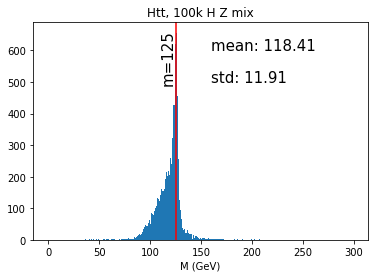

In [101]:
plt.hist(massH,bins=np.arange(0,300,1));
plt.axvline(x=125,color='r')
plt.text(110,500,'m=125',rotation=90,fontsize=15)
plt.title('Htt, 100k H Z mix')
plt.xlabel('M (GeV)')

plt.text(160, 600, f'mean: {np.mean(massH):.2f}', fontsize=15)
plt.text(160, 500, f'std: {np.std(massH):.2f}', fontsize=15)
plt.savefig(prefix+modelName+'-Higgs-hadhad-100k-mass.pdf')


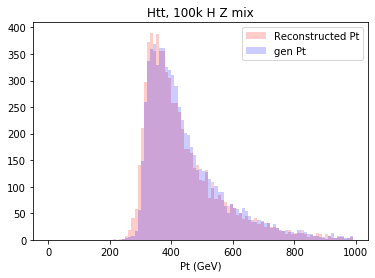

In [87]:
plt.hist(predictions[:,1],bins=np.arange(0,1000,10),color='r',label='Reconstructed Pt',alpha=0.2);
plt.hist(y_test_htt[:,1],bins=np.arange(0,1000,10),color='b',label='gen Pt',alpha=0.2)
plt.title('Htt, 100k H Z mix')
plt.xlabel('Pt (GeV)')
plt.legend()
plt.savefig(prefix+modelName+'-Higgs-hadhad-100k-Pt.pdf')

#plt.axvline(x=125,color='r')



In [92]:
predictions = model.predict([X_test_z, Xalt_test_z, Xevt_test_z])
massZ = predictions[:,0]
Z_rec = (massZ.flatten()-y_test_z[:,0])/y_test_z[:,0]

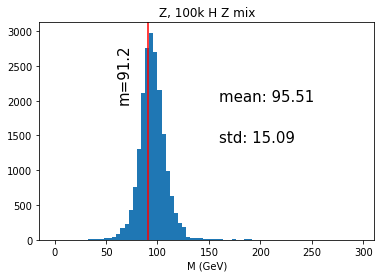

In [102]:
plt.hist(massZ,bins=np.arange(0,300,4));
plt.axvline(x=91.2,color='r')
plt.text(60,2000,'m=91.2',rotation=90,fontsize=15)
plt.title('Z, 100k H Z mix')
plt.xlabel('M (GeV)')

plt.text(160, 2000, f'mean: {np.mean(massZ):.2f}', fontsize=15)
plt.text(160, 1400, f'std: {np.std(massZ):.2f}', fontsize=15)
#plt.savefig(prefix+modelName+'-Z-hadhad-50000.pdf')
plt.savefig(prefix+modelName+'-Z-hadhad-100k-mass.pdf')

#plt.text(200, 600, f'mixratio: {mixratio}%', fontsize=15)

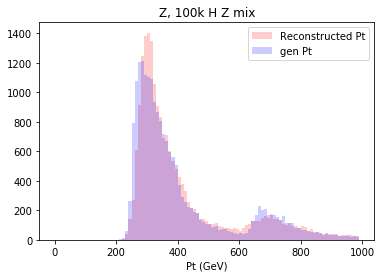

In [103]:
plt.hist(predictions[:,1],bins=np.arange(0,1000,10),color='r',label='Reconstructed Pt',alpha=0.2);
plt.hist(y_test_z[:,1],bins=np.arange(0,1000,10),color='b',label='gen Pt',alpha=0.2)
plt.title('Z, 100k H Z mix')
plt.xlabel('Pt (GeV)')
plt.legend()
plt.savefig(prefix+modelName+'-Z-hadhad-100k-Pt.pdf')

In [106]:
predictions = model.predict([X_test_flat, Xalt_test_flat, Xevt_test_flat])

massFlat = predictions[:,0]


Flat_rec = (massFlat.flatten()-y_test_flat[:,0])/y_test_flat[:,0]

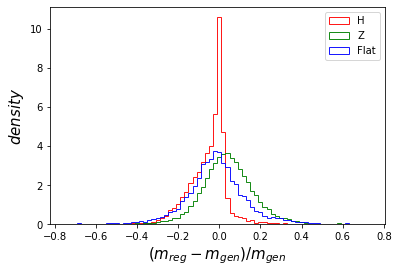

In [107]:
plt.hist(H_rec,bins=np.arange(-0.75,0.75,0.02),alpha=.9,histtype='step',density=True,color='r',label='H');
plt.hist(Z_rec,bins=np.arange(-0.75,0.75,0.02),alpha=.9,histtype='step',density=True,color='g',label='Z');
plt.hist(Flat_rec,bins=np.arange(-0.75,0.75,0.02),alpha=.9,histtype='step',density=True,color='b',label='Flat');
plt.xlabel(r'$(m_{reg}-m_{gen})/m_{gen}$',fontsize=15)
plt.ylabel(r'$density$',fontsize=15)
plt.legend(loc='upper right')
plt.savefig(prefix+modelName+'-100k-response.pdf')


In [70]:
print(np.mean(mass),np.std(mass))

126.06927 9.392275


In [78]:
X_train_z,X_test_z,Xalt_train_z,Xalt_test_z,Xevt_train_z,Xevt_test_z,Y_train_z,Y_test_z,feat_train_z,feat_test_z = load('/nobackup/users/sangeon/DYJetsToLL_0.z');

y_train_z = Y_train_z[:,0]

X_train_z = (X_train_z-part_mean)/part_std
Xalt_train_z = (Xalt_train_z-alt_mean)/alt_std
Xevt_train_z = (Xevt_train_z-evt_mean)/evt_std



In [79]:
predictions_z = model.predict([X_train_z, Xalt_train_z, Xevt_train_z])


In [80]:
regressed_z = (predictions_z * std_Y) + mean_Y

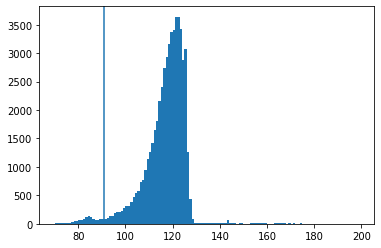

In [81]:
plt.hist(regressed_z,bins=np.arange(70,200,1));
plt.axvline(x=91)

In [56]:
mean_Y = np.mean(y_train[:])
std_Y = np.std(y_train[:])
y_train[:] = (y_train[:]-mean_Y)/std_Y

In [57]:
%matplotlib inline

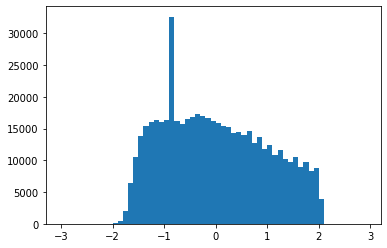

In [58]:
plt.hist(y_train, np.arange(-3,3,0.1));

In [59]:
X_val, X_test, Xalt_val, Xalt_test, Xevt_val, Xevt_test, y_val, y_test = train_test_split(X_test_htt, Xalt_test_htt, Xevt_test_htt, Y_test_htt, test_size=0.5, random_state=42)

In [60]:
y_val[:] = (y_val[:]-mean_Y)/std_Y
y_test[:] = (y_test[:]-mean_Y)/std_Y

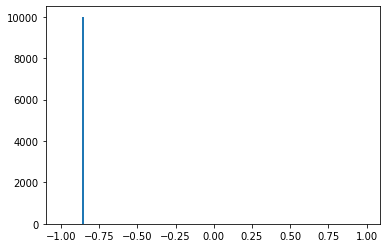

In [61]:
plt.hist(y_val,np.arange(-1,1,0.01));

In [62]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.get_device_name(0)

cuda:0


'GeForce RTX 2080 Ti'

In [63]:
BATCH_SIZE = 500
N_EPOCHS = 80
PRINT_INTERVAL = 2000
NUM_WORKERS = 4
LR = 1e-4

In [64]:
model = SimpleGru()

print(model)
model.to(device)

SimpleGru(
  (gru1): GRU(10, 10, num_layers=10, batch_first=True, dropout=0.5)
  (gru2): GRU(13, 13, num_layers=10, batch_first=True, dropout=0.5)
  (linear1): Linear(in_features=35, out_features=40, bias=True)
  (linear2): Linear(in_features=40, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=10, bias=True)
  (linear4): Linear(in_features=10, out_features=5, bias=True)
  (linear5): Linear(in_features=5, out_features=1, bias=True)
  (linear6): Linear(in_features=6, out_features=3, bias=True)
  (linear7): Linear(in_features=3, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_runnin

SimpleGru(
  (gru1): GRU(10, 10, num_layers=10, batch_first=True, dropout=0.5)
  (gru2): GRU(13, 13, num_layers=10, batch_first=True, dropout=0.5)
  (linear1): Linear(in_features=35, out_features=40, bias=True)
  (linear2): Linear(in_features=40, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=10, bias=True)
  (linear4): Linear(in_features=10, out_features=5, bias=True)
  (linear5): Linear(in_features=5, out_features=1, bias=True)
  (linear6): Linear(in_features=6, out_features=3, bias=True)
  (linear7): Linear(in_features=3, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [65]:
train_data = gruTrainData(torch.FloatTensor(X_train.astype(np.float)),torch.FloatTensor(Xalt_train.astype(np.float)),torch.FloatTensor(Xevt_train.astype(np.float)),torch.FloatTensor(y_train.astype(np.float)))
val_data = gruTrainData(torch.FloatTensor(X_val.astype(np.float)),torch.FloatTensor(Xalt_val.astype(np.float)),torch.FloatTensor(Xevt_val.astype(np.float)),torch.FloatTensor(np.array(y_val).astype(np.float)))
test_data = gruTestData(torch.FloatTensor(X_test.astype(np.float)),torch.FloatTensor(Xalt_test.astype(np.float)),torch.FloatTensor(Xevt_test.astype(np.float))) 

In [66]:
train_loader = utils.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = utils.DataLoader(dataset=val_data, batch_size=100)
test_loader = utils.DataLoader(dataset=test_data, batch_size=100)

In [67]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.SmoothL1Loss()

In [68]:
def train():
    # set the train mode
    model.train()

    # loss of the epoch
    epoch_loss = 0
    epoch_acc = 0

    for x1,x2,x3, y in train_loader:
        # reshape the data into [batch_size, 784]
        x1,x2,x3,y = x1.to(device),x2.to(device),x3.to(device), y.to(device)

        # update the gradients to zero
        optimizer.zero_grad()

        # forward pass
        y_pred = model(x1,x2,x3)

        # reconstruction loss
        #recon_loss = F.binary_cross_entropy(x_sample, x, size_average=False)

        # kl divergence loss
        #kl_loss = 0.5 * torch.sum(torch.exp(z_var) + z_mu**2 - 1.0 - z_var)

        # total loss
        #loss = recon_loss + kl_loss

        #BCE loss
        loss = criterion(y_pred, y.unsqueeze(1))
        
        # backward pass
        loss.backward()
        epoch_loss += loss.item()

        # update the weights
        optimizer.step()

    return epoch_loss

In [69]:
def test():
    # set the evaluation mode
    model.eval()

    # test loss for the data
    test_loss = 0

    # we don't need to track the gradients, since we are not updating the parameters during evaluation / testing
    with torch.no_grad():
        for x1,x2,x3, y in val_loader:
            # reshape the data
            #x = x.view(-1, 28 * 28)
            x1,x2,x3,y = x1.to(device),x2.to(device),x3.to(device), y.to(device)
            # forward pass
            y_pred = model(x1,x2,x3)

            loss = criterion(y_pred, y.unsqueeze(1))
            # total loss
            
            test_loss += loss.item()

    return test_loss


In [70]:
mixratio

3

In [74]:
model.load_state_dict(torch.load(f"/data/t3home000/spark/MassRegression/weights/supervised_gru_allinput_{mixratio}_v0.h5"))

<All keys matched successfully>

In [75]:
best_test_loss = 9
patience_counter = 0
for e in range(500):

    train_loss = train()
    test_loss = test()

    train_loss /= len(train_data)
    test_loss /= len(val_data)

    print(f'Epoch {e}, Train Loss: {train_loss:.7f}, Test Loss: {test_loss:.7f}')

    if best_test_loss > test_loss:
        best_test_loss = test_loss
        torch.save(model.state_dict(), f"/data/t3home000/spark/MassRegression/weights/supervised_gru_allinput_{mixratio}_v0.h5")
        patience_counter = 1
        print('saving model')
    else:
        print('NOT SAVING')
        patience_counter += 1

    if patience_counter > 10:
        print('patience limit reached')
        break

Epoch 0, Train Loss: 0.0001659, Test Loss: 0.0002834
saving model
Epoch 1, Train Loss: 0.0001641, Test Loss: 0.0004345
NOT SAVING
Epoch 2, Train Loss: 0.0001627, Test Loss: 0.0003051
NOT SAVING
Epoch 3, Train Loss: 0.0001622, Test Loss: 0.0002499
saving model
Epoch 4, Train Loss: 0.0001608, Test Loss: 0.0003811
NOT SAVING
Epoch 5, Train Loss: 0.0001602, Test Loss: 0.0003096
NOT SAVING
Epoch 6, Train Loss: 0.0001598, Test Loss: 0.0004731
NOT SAVING
Epoch 7, Train Loss: 0.0001585, Test Loss: 0.0002557
NOT SAVING
Epoch 8, Train Loss: 0.0001608, Test Loss: 0.0002906
NOT SAVING
Epoch 9, Train Loss: 0.0001581, Test Loss: 0.0002969
NOT SAVING


KeyboardInterrupt: 

In [76]:
model.eval()
y_pred_list = np.array([],dtype=np.float)
with torch.no_grad():
    for batch_idx, (x1,x2,x3) in enumerate(test_loader):
        x1 = x1.to(device)
        x2 = x2.to(device)
        x3 = x3.to(device)
        y_test_pred = model(x1,x2,x3)
        #y_test_pred = torch.sigmoid(y_test_pred)
        #y_pred_tag = torch.round(y_test_pred)
        y_pred_list = np.append(y_pred_list,y_test_pred.cpu().numpy())

In [77]:
predicted_mass = (y_pred_list * std_Y) + mean_Y

In [78]:
%matplotlib inline


In [79]:
mixratio

3

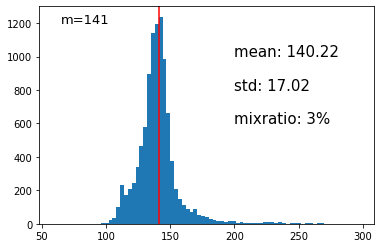

In [86]:
n,b,patches = plt.hist(predicted_mass,np.arange(60,300,3))
plt.text(200, 1000, f'mean: {np.mean(predicted_mass):.2f}', fontsize=15)
plt.text(200, 800, f'std: {np.std(predicted_mass):.2f}', fontsize=15)

plt.text(200, 600, f'mixratio: {mixratio}%', fontsize=15)

plt.text(65, 1200, f'm={b[bin_max][0]}', fontsize=13)

plt.axvline(x=b[bin_max][0],color='r')
plt.savefig('hadhad_mixratio_11')

In [84]:
bin_max = np.where(n == n.max())

In [85]:
b[bin_max][0]

141

In [30]:
relerr = (predicted_mass - 125) /125

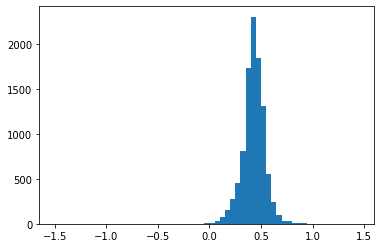

In [31]:
plt.hist(relerr,np.arange(-1.5,1.5,0.05));